In [6]:
import numpy as np
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


In [9]:
path_students_2023 = 'course/students_info/students_2023.gpkg'
path_students_2024 = 'course/students_info/students_2024.gpkg'
path_students_2025 = 'course/students_info/students_2025.gpkg'

path_num_stud_province_2023 = 'course/students_info/num_stud_province_2023.gpkg' 
path_num_stud_province_2024 = 'course/students_info/num_stud_province_2024.gpkg' 
path_num_stud_province_2025 = 'course/students_info/num_stud_province_2025.gpkg' 

In [ ]:
students_2023 = gpd.read_file(path_students_2023)
students_2024 = gpd.read_file(path_students_2024)
students_2025 = gpd.read_file(path_students_2025)
num_stud_province_2023 = gpd.read_file(path_num_stud_province_2023)
num_stud_province_2024 = gpd.read_file(path_num_stud_province_2024)
num_stud_province_2025 = gpd.read_file(path_num_stud_province_2025)
students_2023.head(2)
num_stud_province_2023.head(2) 

,pr_adcode,pr_name,cn_adcode,cn_name,num_students_2023,geometry
0,110000,北京市,100000,中华人民共和国,0,"MULTIPOLYGON (((116.89226 39.69491, 116.89227 ..."
1,120000,天津市,100000,中华人民共和国,0,"MULTIPOLYGON (((113.77712 36.63946, 113.7808 3..."


In [29]:
students_2025_center = students_2025.copy()
students_2025_center['geometry'] = students_2025.geometry.representative_point()    


In [32]:

num_stud_province_all = num_stud_province_2023.copy() 
num_stud_province_all.pop('num_students_2023')
num_stud_province_all['num_students_all'] = num_stud_province_2023['num_students_2023'] + \
                                            num_stud_province_2024['num_students_2024'] + \
                                            num_stud_province_2025['num_students_2025'] 
num_stud_province_all.head(2)


,pr_adcode,pr_name,cn_adcode,cn_name,geometry,num_students_all
0,110000,北京市,100000,中华人民共和国,"MULTIPOLYGON (((116.89226 39.69491, 116.89227 ...",0
1,120000,天津市,100000,中华人民共和国,"MULTIPOLYGON (((113.77712 36.63946, 113.7808 3...",2


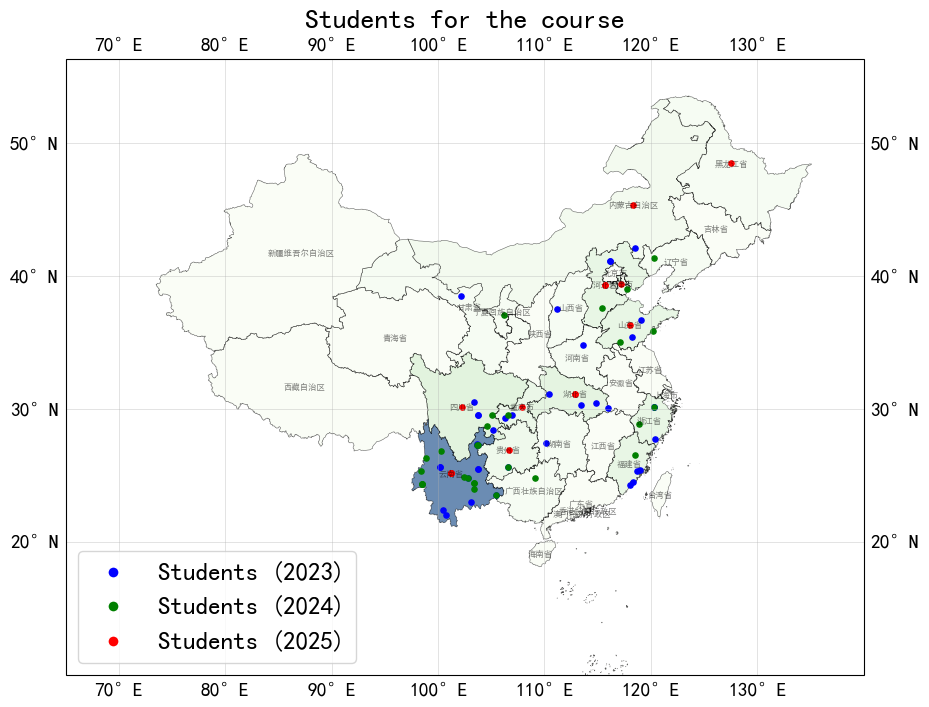

In [ ]:
geo_province_centers = num_stud_province_2023.geometry.representative_point()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([65, 140, 10, 50])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
# ax.stock_img()
# china_province.plot(ax = ax, facecolor='None', edgecolor='black', lw=0.5)
num_stud_province_all.plot(ax=ax, column='num_students_all', 
                            cmap='GnBu', edgecolor='black', alpha=0.6, 
                            legend=False, linewidth=0.4, 
                            legend_kwds={'label': 'Number of students', 'shrink':0.7})
students_2023.plot(ax=ax, edgecolor='blue', facecolor='blue', markersize=14)
students_2024.plot(ax=ax, edgecolor='green', facecolor='green', markersize=14)
students_2025_center.plot(ax=ax, edgecolor='red', facecolor='red', markersize=14)
plt.rcParams['font.family'] = 'SimHei' 
for x, y, label in zip(geo_province_centers.x, geo_province_centers.y, num_stud_province_2023['pr_name']):
    ax.text(x, y, label, fontsize=6, ha='center', va='center', alpha=0.5, transform=ccrs.PlateCarree())
legend_patches = [
  Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Students (2023)'),
  Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Students (2024)'),
  Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Students (2025)'),
  ]
ax.legend(handles=legend_patches, loc='lower left', fontsize=18)
ax.set_title('Students for the course', fontsize=20)
# plt.savefig('figs/distibution_students.png', bbox_inches='tight', dpi=100)


In [40]:

num_boy_2023 = students_2023[students_2023['Gender'] == 'boy'].shape[0]
num_girl_2023 = students_2023[students_2023['Gender'] == 'girl'].shape[0]
num_boy_2024 = students_2024[students_2024['Gender'] == 'boy'].shape[0]
num_girl_2024 = students_2024[students_2024['Gender'] == 'girl'].shape[0]
num_boy_2025 = students_2025[students_2025['性别'] == '男'].shape[0]
num_girl_2025 = students_2025[students_2025['性别'] == '女'].shape[0]

data = {
    'Year': ['2023', '2024', '2025'],
    'Boys': [num_boy_2023, num_boy_2024, num_boy_2025],
    'Girls': [num_girl_2023, num_girl_2024, num_girl_2025]}
df_gender = pd.DataFrame(data)


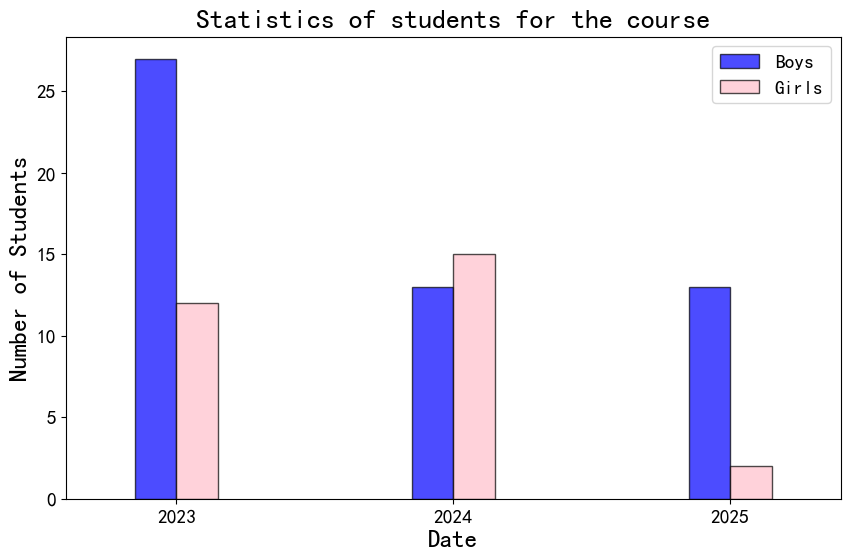

In [43]:
plt.rcParams.update({'font.size': 14})
df_gender['Total'] = df_gender['Boys'] + df_gender['Girls']
fig, ax = plt.subplots(figsize=(10, 6))
df_gender.plot(kind='bar', x='Year', y=['Boys', 'Girls'], 
               ax=ax, color=['blue', 'pink'], alpha=0.7, 
               edgecolor='black', linewidth=1, width=0.3)
ax.tick_params(axis='x', rotation=0)
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Number of Students', fontsize=18)
ax.set_title('Statistics of students for the course', fontsize=20)
plt.savefig('figs/stats_students.png', bbox_inches='tight', dpi=100)
